# Metodología Bix Jenkins

In [1]:
#%pip install arch

In [2]:
#Importar las librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA # Modelo ARIMA
from statsmodels.tsa.stattools import adfuller # Test de Dickey-Fuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Funciones para graficar ACF y PACF
from statsmodels.stats.diagnostic import acorr_ljungbox # Test de Ljung-Box
from statsmodels.sandbox.stats.runs import runstest_1samp # Test de rachas
from arch.unitroot import PhillipsPerron # Test de raíz unitaria
from statsmodels.tsa.seasonal import seasonal_decompose # Descomposición estacional
from statsmodels.graphics.gofplots import qqplot # Gráfico Q-Q
from statsmodels.stats.stattools import jarque_bera # Test de normalidad



- **cargar la data**

In [3]:
df=pd.read_csv('https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/Caffeine.csv')
df

,Unnamed: 0,x
0,1,0.429
1,2,0.443
2,3,0.451
3,4,0.455
4,5,0.440
...,...,...
173,174,0.393
174,175,0.394
175,176,0.389
176,177,0.391


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,x
0,0.429
1,0.443
2,0.451
3,0.455
4,0.440
...,...
173,0.393
174,0.394
175,0.389
176,0.391


In [5]:
Fecha=pd.date_range(start='1/1/2025', periods=len(df), freq='D')
Fecha

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-06-18', '2025-06-19', '2025-06-20', '2025-06-21',
               '2025-06-22', '2025-06-23', '2025-06-24', '2025-06-25',
               '2025-06-26', '2025-06-27'],
              dtype='datetime64[ns]', length=178, freq='D')

In [6]:
df["Fecha"]=Fecha # Agregar la columna de fecha
df

,x,Fecha
0,0.429,2025-01-01
1,0.443,2025-01-02
2,0.451,2025-01-03
3,0.455,2025-01-04
4,0.440,2025-01-05
...,...,...
173,0.393,2025-06-23
174,0.394,2025-06-24
175,0.389,2025-06-25
176,0.391,2025-06-26


In [7]:
df.set_index('Fecha', inplace=True)
df.head(3)

,x
Fecha,
2025-01-01,0.429
2025-01-02,0.443
2025-01-03,0.451


In [8]:
df.rename(columns={'x':'Concentracion'}, inplace=True)
df

,Concentracion
Fecha,
2025-01-01,0.429
2025-01-02,0.443
2025-01-03,0.451
2025-01-04,0.455
2025-01-05,0.440
...,...
2025-06-23,0.393
2025-06-24,0.394
2025-06-25,0.389


- gráfico de la serie

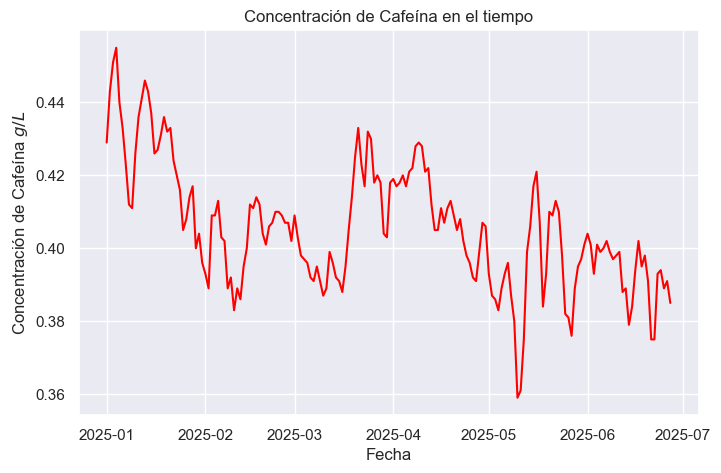

In [9]:
sns.set_theme()

plt.figure(figsize=(8,5)) # Tamaño de la figura
plt.plot(df.index, df['Concentracion'], color='red') # Gráfico de la serie de tiempo
plt.xlabel('Fecha')    # Etiqueta del eje x
plt.ylabel('Concentración de Cafeína $g/L$') # Etiqueta del eje y
plt.title('Concentración de Cafeína en el tiempo') # Título del gráfico
plt.show() # Mostrar el gráfico


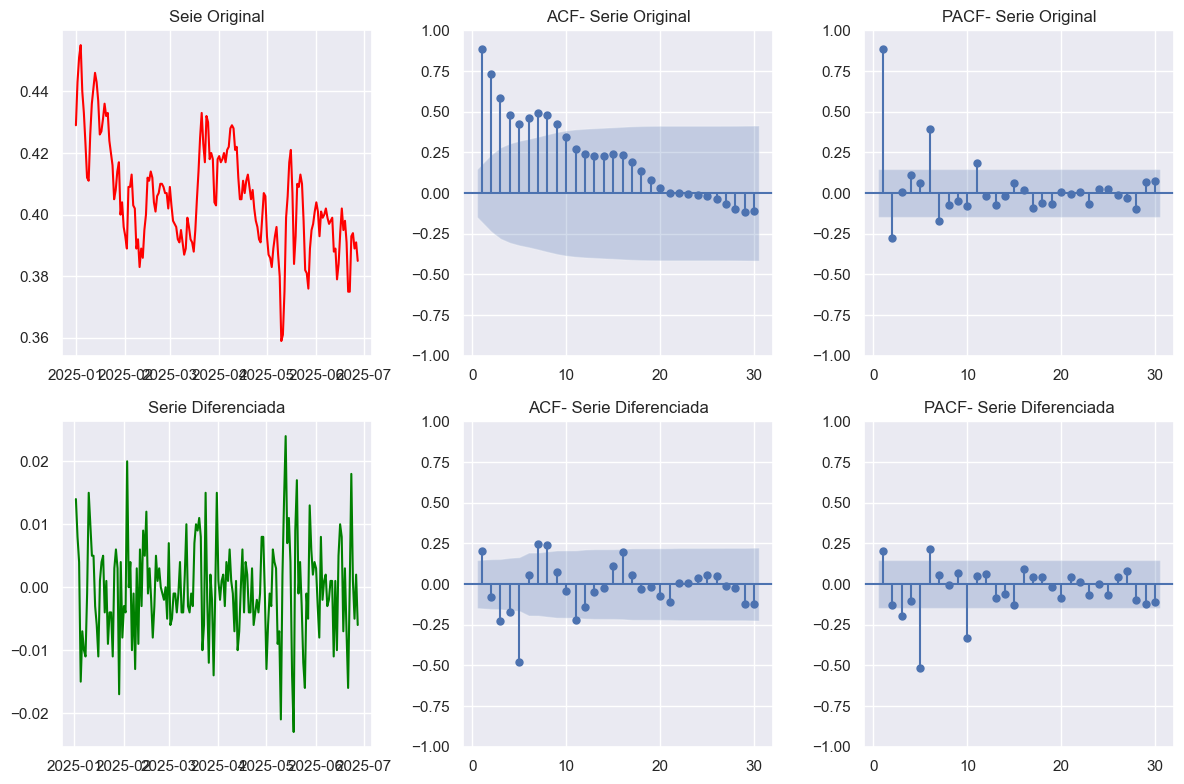

In [10]:
fig,  ax= plt.subplots(2,3, figsize=(12,8)) # Crear la figura y los ejes

ax[0,0].plot(df.index, df['Concentracion'], color='red') # Gráfico de la serie de tiempo
ax[0,0].set_title("Seie Original")

plot_acf(df['Concentracion'], ax=ax[0,1], lags=30, zero=False) # Gráfico de la función de autocorrelación
ax[0,1].set_title("ACF- Serie Original")

plot_pacf(df['Concentracion'], ax=ax[0,2], lags=30, zero=False) # Gráfico de la función de autocorrelación parcial
ax[0,2].set_title("PACF- Serie Original")

ax[1,0].plot(df.index, df['Concentracion'].diff(), color='green') # Gráfico de la serie de tiempo diferenciada
ax[1,0].set_title("Serie Diferenciada")

plot_acf(df['Concentracion'].diff().dropna(), ax=ax[1,1], lags=30, zero=False) # Gráfico de la función de autocorrelación
ax[1,1].set_title("ACF- Serie Diferenciada")

plot_pacf(df['Concentracion'].diff().dropna(), ax=ax[1,2], lags=30, zero=False) # Gráfico de la función de autocorrelación parcial
ax[1,2].set_title("PACF- Serie Diferenciada")

plt.tight_layout() # Ajustar el espacio entre los gráficos
plt.show() # Mostrar los gráficos

# Pruebas de Raiz unitaria -  Verficar estacionariedad

- Dickey Fuller
-  Phillips-Perron
  
$$
\begin{cases}
H_0: y_t \  \text{es no estacionaria}\\
H_1: y_t \  \text{es estacionaria}
\end{cases}
$$

Se rechaza $H_0$   si el valor p < 0.05

In [11]:
print("Dickey-Fuller Serie Original")
tes_dicke =adfuller(df['Concentracion'], autolag='AIC') # Test de Dickey-Fuller
print(f"Estadístico de prueba: {tes_dicke[0]}")
print(f"p-valor: {tes_dicke[1]}")

Dickey-Fuller Serie Original
Estadístico de prueba: -1.9913604296227319
p-valor: 0.29037405072544553


p-valor: 0.29037405072544553 > 0.05  la serie de tiempo del concentracion de cafeina es no estacionaria 

In [12]:
print("Phillips-Perron Serie Original")
tes_phillips = PhillipsPerron(df['Concentracion']) # Test de Phillips-Perron 
tes_phillips   

Phillips-Perron Serie Original


Test Statistic,-2.792
P-value,0.059
Lags,14


segun Phillips-Perron la serie de la concentracion  de cafeina es no estacionaria.

### Pruebas de raís unitaria con la serie diferenciada

In [13]:
print("Dickey-Fuller Serie diferenciada")
adf_dif= adfuller(df['Concentracion'].diff().dropna(), autolag='AIC') # Test de Dickey-Fuller
print(f"Estadístico de prueba: {adf_dif[0]}")
print(f"p-valor: {adf_dif[1]}") 

Dickey-Fuller Serie diferenciada
Estadístico de prueba: -5.9415385694862595
p-valor: 2.254860125149353e-07


valor p0.065 se rechaza Ho y concluimos que la serie difrenciada es estacionaria. 

In [14]:
PhillipsPerron(df['Concentracion'].diff().dropna()) # Test de Phillips-Perron

Test Statistic,-11.708
P-value,0.000
Lags,14


De acueroo a l test de Phillips Perron la serie diferenciada es estacionaria

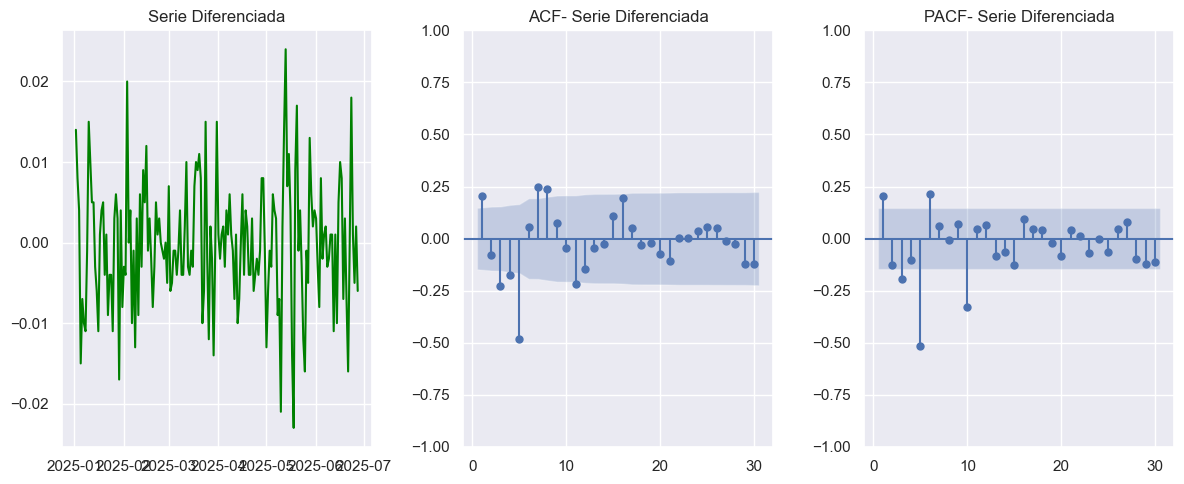

In [15]:
fig ,ax= plt.subplots(1,3, figsize=(12,5)) # Crear la figura y los ejes

ax[0].plot(df.index, df['Concentracion'].diff(), color='green') # Gráfico de la serie de tiempo diferenciada
ax[0].set_title("Serie Diferenciada")

plot_acf(df['Concentracion'].diff().dropna(), ax=ax[1], lags=30, zero=False) # Gráfico de la función de autocorrelación
ax[1].set_title("ACF- Serie Diferenciada")

plot_pacf(df['Concentracion'].diff().dropna(), ax=ax[2], lags=30, zero=False) # Gráfico de la función de autocorrelación parcial
ax[2].set_title("PACF- Serie Diferenciada")

plt.tight_layout() # Ajustar el espacio entre los gráficos
plt.show() # Mostrar los gráficos

Modelos

- ARIMA(5,1,0)
- ARIMA(6,1,0)
- ARIMA(10, 1, 0)
- ARIMA(0,1,8)
- ARIMA(0,1,5)
- ARIMA(5,1,5)

# Estimacion del modelo

### modelo 1  ARIMA (0,1,8)

In [16]:
modelo_1=ARIMA(df['Concentracion'], order=(0,1,8)).fit() # Modelo ARIMA(1,1,1)
print(modelo_1.summary()) # Resumen del modelo

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Concentracion   No. Observations:                  178
Model:                 ARIMA(0, 1, 8)   Log Likelihood                 674.862
Date:                Sat, 01 Mar 2025   AIC                          -1331.723
Time:                        12:55:09   BIC                          -1303.138
Sample:                    01-01-2025   HQIC                         -1320.130
                         - 06-27-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3427      0.078      4.374      0.000       0.189       0.496
ma.L2         -0.0334      0.095     -0.352      0.725      -0.219       0.153
ma.L3         -0.2118      0.078     -2.723      0.0

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Diagnostico

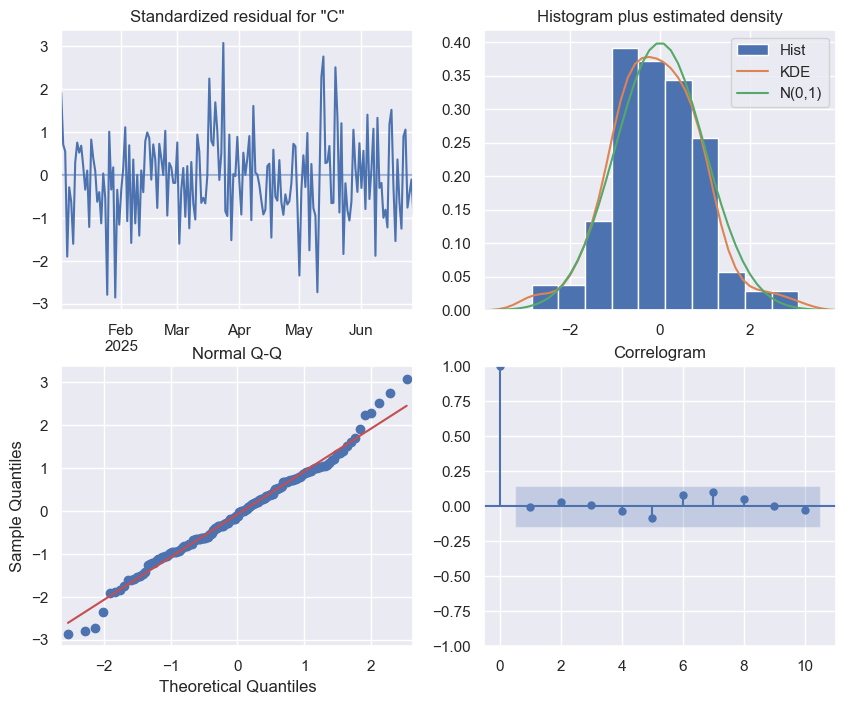

In [17]:
modelo_1.plot_diagnostics(figsize=(10,8)) # Diagnóstico del modelo
plt.show() # Mostrar los gráficos

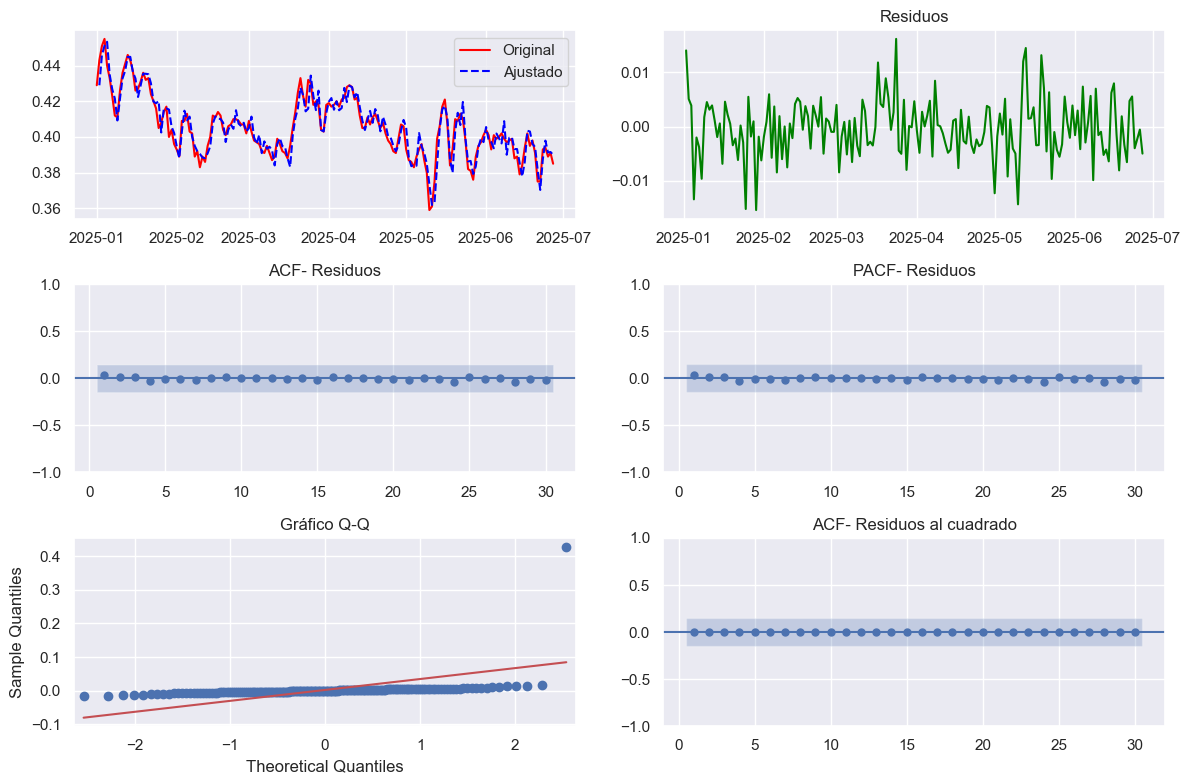

In [18]:
residuos=modelo_1.resid # Residuos del modelo


fig, ax= plt.subplots(3,2, figsize=(12,8)) # Crear la figura y los ejes

ax[0,0].plot(df.index, df['Concentracion'], color='red', label="Original") # Gráfico de la serie de tiempo
ax[0,0].plot(modelo_1.fittedvalues[1:], color='blue', linestyle="dashed", label="Ajustado")
ax[0,0].legend()

ax[0,1].plot(residuos[1:], color='green') # Gráfico de los residuos
ax[0,1].set_title("Residuos")

plot_acf(residuos, ax=ax[1,0], lags=30, zero=False) # Gráfico de la función de autocorrelación
ax[1,0].set_title("ACF- Residuos")  

plot_pacf(residuos, ax=ax[1,1], lags=30, zero=False) # Gráfico de la función de autocorrelación parcial
ax[1,1].set_title("PACF- Residuos")

qqplot(residuos, line='s', ax=ax[2,0]) # Gráfico Q-Q
ax[2,0].set_title("Gráfico Q-Q")

plot_acf(residuos**2, ax=ax[2,1], lags=30, zero=False) # Gráfico de la función de autocorrelación
ax[2,1].set_title("ACF- Residuos al cuadrado")

plt.tight_layout() # Ajustar el espacio entre los gráficos

### Prueba de Ljung-Box   correlacion serial en los residuales

$$
\begin{cases}
H_0: \text{Ausencia de correlacion serial en los residuales}\\
H_1: \text{Hay correlacion serial en los residuales}
\end{cases}
$$

objetivo.  **No rechazar**


$$
\begin{cases}
H_0: r_o=r_1=... r_k =0\\
H_1:  r_j \neq 0 \text{Para algun j}
\end{cases}
$$


In [19]:
Lj=modelo_1.test_serial_correlation(method='ljungbox') # Test de Ljung-Box
Lj


array([[[1.82924902e-03, 1.42159260e-01, 1.52491695e-01, 3.40471802e-01,
         1.74370184e+00, 2.91297786e+00, 4.86798897e+00, 5.43701587e+00,
         5.43734297e+00, 5.55051490e+00],
        [9.65885101e-01, 9.31387723e-01, 9.84867630e-01, 9.87053982e-01,
         8.83348724e-01, 8.19687143e-01, 6.76069316e-01, 7.10007671e-01,
         7.94640397e-01, 8.51508869e-01]]])

In [29]:
acorr_ljungbox(residuos, lags=15) # Test de Ljung-Box


,lb_stat,lb_pvalue
1,0.195186,0.658635
2,0.227774,0.892359
3,0.244821,0.970048
4,0.416621,0.981094
5,0.424008,0.994642
6,0.430487,0.998584
7,0.494538,0.999466
8,0.501748,0.999865
9,0.524607,0.999963
10,0.533998,0.999991


##  Normalidad 

$$
\begin{cases}
H_0: \text{Los redsiduales siguen una distribucion normal}\\
H_1: \text{Los residuales no siguen una distribucion normal}
\end{cases}
$$

In [ ]:
#normalidad
modelo_1.test_normality(method='jarquebera') # Test de Jarque-Bera



array([[3.49459133, 0.17424452, 0.11387409, 3.64959499]])

Aleatoriedad  tes de rachas

$$
\begin{cases}
H_0: \text{Los redsiduales son aleatorios}\\
H_1: \text{Los residuales no son aleatorios}
\end{cases}
$$

In [ ]:
estadis, pvalor = runstest_1samp(residuos) # Test de rachas
print(f"Estadístico de prueba: {estadis}")
print(f"p-valor: {pvalor}")

Estadístico de prueba: -1.3544537248534405
p-valor: 0.17559166732821785


pronostico=modelo

Concl:  los Resdiduales siguen una distribucion normal

Pronostico

In [42]:
modelo_1.get_prediction(start='2025-06-28', end='2025-07-05').summary_frame(alpha=0.05) # Predicción

Concentracion,mean,mean_se,mean_ci_lower,mean_ci_upper
2025-06-28,0.376022,0.005230,0.365772,0.386272
2025-06-29,0.376934,0.008755,0.359774,0.394094
2025-06-30,0.382796,0.011115,0.361012,0.404581
2025-07-01,0.384124,0.012509,0.359607,0.408640
2025-07-02,0.386666,0.014006,0.359214,0.414118
2025-07-03,0.386952,0.014172,0.359176,0.414729
2025-07-04,0.386005,0.014213,0.358148,0.413862
2025-07-05,0.384588,0.014340,0.356481,0.412694


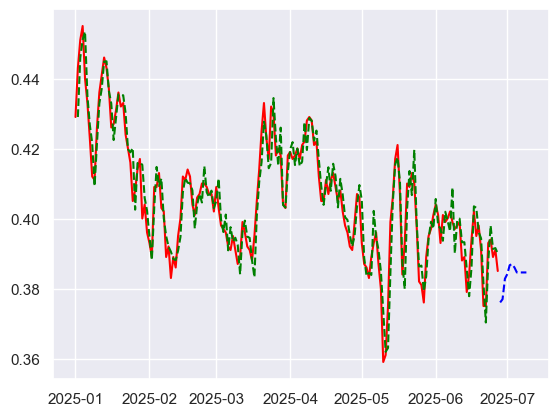

In [39]:
pronostico= modelo_1.forecast(steps=12) # Pronóstico de 12 pasos


plt.plot(df.index, df['Concentracion'], color='red', label="Original") # Gráfico de la serie de tiempo
plt.plot(pronostico, color='blue', linestyle="dashed", label="Pronóstico")
plt.plot(modelo_1.fittedvalues[1:], color='green', linestyle="dashed", label="Ajustado")


|modelo | BIC  |  Ljung-Box | Normalidad  |   Aleatoriedad|
|---|---|---|---|---|
|ARIMA(0,1,8) |-1303.138| ok|ok| ok |